In [12]:
cd ".."

c:\Users\offic


In [6]:
import json
import pandas as pd
import re
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
from Utilities.Scripts.Functions import *

In [15]:
with open("Configurations.yaml","r") as configurations:
    _Configurations = json.load(configurations)

## Sample Dataset Overview

In [ ]:
df = pd.read_csv(_Configurations["Dataset"]["Original"]["SampleDatasetPath"])

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
'TRANSACTION_KEY',7188661,3941207,'T-1816500000000637388',8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'TICKETING_AIRLINE',7188661,361,'American Airlines Inc. ',651215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'TICKETING_AIRLINE_CD',7188661,361,'001',651215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'AGENCY',7188661,34109,'',4149928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'ISSUE_DATE',7188661,365,'2018-03-06',27003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'COUNTRY',7188661,49,'US',2026369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'TRANSACTION_TYPE',7188661,3,'I',6332029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'TRIP_TYPE',7188661,3,'RT',3816108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'SEG_NUMBER',7188661.0,NaN,NaN,NaN,1.749051,1.052754,1.0,1.0,1.0,2.0,8.0
'MARKETING_AIRLINE',7188661,419,'American Airlines Inc. ',637846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dtypes

'TRANSACTION_KEY'         object
'TICKETING_AIRLINE'       object
'TICKETING_AIRLINE_CD'    object
'AGENCY'                  object
'ISSUE_DATE'              object
'COUNTRY'                 object
'TRANSACTION_TYPE'        object
'TRIP_TYPE'               object
'SEG_NUMBER'               int64
'MARKETING_AIRLINE'       object
'MARKETING_AIRLINE_CD'    object
'FLIGHT_NUMBER'           object
'CABIN'                   object
'ORIGIN'                  object
'DESTINATION'             object
'DEPARTURE_DATE'          object
dtype: object

Anomolies Noted :
1. 'FLIGHT_NUMBER' has invalid value "\\N" which may stand for Invalid entry, or a Non-Flight Segment
2. 'DEPARTURE_DATE' has invalid value "\N" which may stand for Invalid entry, or a Non-Flight Segment
3. 'ISSUE_DATE' and 'DEPARTURE_DATE' need to be converted into date data-type

## RENAMING COLUMNS

we remove the quote's from column name. We also change the name of the following columns:
- ORIGIN : ORIGIN_AIRPORT
- DESTINATION : DESTINATION_AIRPORT

In [ ]:
newColumnNameDict = {}
for columnName in df.columns:
    newColumnNameDict[columnName] = columnName[1:-1]

In [ ]:
newColumnNameDict["'ORIGIN'"] = "ORIGIN_AIRPORT"
newColumnNameDict["'DESTINATION'"] = "DESTINATION_AIRPORT"

In [ ]:
df = df.rename(columns = newColumnNameDict, inplace = False)
df.head()

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
0,'T-1808639477801385302','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2251,'Prem','CGO','SYX','2018-04-14'
1,'T-1808639477801385684','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2227,'Econ','CTU','CGO','2018-03-31'
2,'T-1808639477801386920','Chengdu Airlines ','811','','2018-03-26','CN','I','OW',1,'Chengdu Airlines ','EU',2717,'Econ','BHY','CKG','2018-05-04'
3,'T-1808639477801386961','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2303,'Econ','KWE','FOC','2018-03-30'
4,'T-1808639477801387207','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2220,'Econ','NNG','CTU','2018-04-03'


## FINDING OUT OCCURENCES OF NAN & INVALID VALUES

- SEG_NUMBER
- FLIGHT_NUMBER
- DEPARTURE_DATE

In [ ]:
invalidValueCount = {'SEG_NUMBER':{}, 'FLIGHT_NUMBER':{}, 'DEPARTURE_DATE':{}}

for index, row in df[['SEG_NUMBER','FLIGHT_NUMBER','DEPARTURE_DATE']].iterrows():
    
    # Invalid Segment Number
    if not str(row['SEG_NUMBER']).isdigit():
        invalidValueCount['SEG_NUMBER'] = IncreaseDictValue(invalidValueCount['SEG_NUMBER'], str(row['SEG_NUMBER']))
        
    # Invalid Flight Number
    if not str(row['FLIGHT_NUMBER']).isdigit():
        invalidValueCount['FLIGHT_NUMBER'] = IncreaseDictValue(invalidValueCount['FLIGHT_NUMBER'], str(row['FLIGHT_NUMBER']))
    
    # Invalid Departure Date
    if not re.search(r"^'\d\d\d\d-\d\d-\d\d'$",str(row['DEPARTURE_DATE'])):
        invalidValueCount['DEPARTURE_DATE'] = IncreaseDictValue(invalidValueCount['DEPARTURE_DATE'], str(row['DEPARTURE_DATE']))

In [ ]:
invalidValueCount

{'SEG_NUMBER': {},
 'FLIGHT_NUMBER': {'\\\\N': 128310},
 'DEPARTURE_DATE': {"'\\N'": 135379}}

We note that:
- No invalid entries for SEG_NUMBER
- Only single invalid entries for FLIGHT_NUMBER and also for DEPARTURE_DATE, for which we will explore the case

## CONNECTING AIRPORTS TO COUNTIES

Note: For this we have pre-processed the Airport Dataset

- connecting 'ORIGIN_AIRPORT' to 'ORIGIN_COUNTRY'
- connecting 'DESTINATION_AIRPORT' to 'DESTINATION_COUNTRY'

In [ ]:
df.columns

Index(['TRANSACTION_KEY', 'TICKETING_AIRLINE', 'TICKETING_AIRLINE_CD',
       'AGENCY', 'ISSUE_DATE', 'COUNTRY', 'TRANSACTION_TYPE', 'TRIP_TYPE',
       'SEG_NUMBER', 'MARKETING_AIRLINE', 'MARKETING_AIRLINE_CD',
       'FLIGHT_NUMBER', 'CABIN', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DATE'],
      dtype='object')

In [ ]:
airport_df = pd.read_csv(_Configurations["Utilities"]["Dataset"]["Processed"]["AirportCodes"])
airport_df.columns

Index(['Unnamed: 0', 'AIRPORT_NAME', 'COUNTY', 'AIRPORT_ELEVATION',
       'COUNTRY_REGION', 'MUNICIPALITY', 'AIRPORT_CODE', 'COORDINATES'],
      dtype='object')

In [ ]:
## Let's first check if all Airport codes present in the dataset are also present in the airport codes dataset

airports_in_df = set(df["ORIGIN_AIRPORT"].unique()).intersection(df["DESTINATION_AIRPORT"].unique())

airport_in_airport_df = set([(r"'" + x + r"'") for x in airport_df["AIRPORT_CODE"].unique()])

print("No. of airport codes not available in the airport codes dataset: ",len(airports_in_df - airport_in_airport_df))

print("No. of airport codes in the travel verse dataset: ",len(airports_in_df))

No. of airport codes not available in the airport codes dataset:  106
No. of airport codes in the travel verse dataset:  2828


Approximately 3.75% airport codes are not present, which is okay!

So, meanwhile let's perform a left outer join adding two new column 'ORIGIN_COUNTRY', 'DESTINATION_COUNTRY'

In [ ]:
airport_df = airport_df[["AIRPORT_CODE","COUNTY"]]

### Adding 'ORIGIN_COUNTRY"

In [ ]:
#First creating a dataframe with changed column names

temp_airport_df = airport_df.copy()
temp_airport_df.rename(columns={"COUNTY":"ORIGIN_COUNTRY"},inplace=True)
temp_airport_df["ORIGIN_AIRPORT"] = r"'" + temp_airport_df["AIRPORT_CODE"] + r"'"
temp_airport_df = temp_airport_df.drop(["AIRPORT_CODE"],axis=1)
temp_airport_df

,ORIGIN_COUNTRY,ORIGIN_AIRPORT
0,MH,'UTK'
1,US,'OCA'
2,US,'PQS'
3,US,'CSE'
4,US,'JCY'
...,...,...
9073,CN,'DLC'
9074,CN,'TNH'
9075,CN,'SHE'
9076,CN,'YNJ'


In [ ]:
# Performing Left-Inner Join
print("Previous Size of df: ", df.shape)
df = df.merge(temp_airport_df,on="ORIGIN_AIRPORT",how="left")
print("Current Size of df: ", df.shape)

Previous Size of df:  (7188661, 16)
Current Size of df:  (7188661, 17)


### Adding 'DESTINATION_COUNTRY"

In [ ]:
temp_airport_df.rename(columns={"ORIGIN_COUNTRY":"DESTINATION_COUNTRY", "ORIGIN_AIRPORT":"DESTINATION_AIRPORT"},inplace=True)

# Performing Left-Inner Join
print("Previous Size of df: ", df.shape)
df = df.merge(temp_airport_df,on="DESTINATION_AIRPORT",how="left")
print("Current Size of df: ", df.shape)

Previous Size of df:  (7188661, 17)
Current Size of df:  (7188661, 17)


#### Travel Verse dataset after associating airport codes with country codes

In [ ]:
df.to_csv("Dataset/Processed/SampleDataset/SampleDataset.csv",index=False)

df

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
0,'T-1808639477801385302','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2251,'Prem','CGO','SYX','2018-04-14',CN,CN
1,'T-1808639477801385684','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2227,'Econ','CTU','CGO','2018-03-31',CN,CN
2,'T-1808639477801386920','Chengdu Airlines ','811','','2018-03-26','CN','I','OW',1,'Chengdu Airlines ','EU',2717,'Econ','BHY','CKG','2018-05-04',CN,CN
3,'T-1808639477801386961','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2303,'Econ','KWE','FOC','2018-03-30',CN,CN
4,'T-1808639477801387207','Chengdu Airlines ','811','','2018-03-27','CN','I','OW',1,'Chengdu Airlines ','EU',2220,'Econ','NNG','CTU','2018-04-03',CN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188656,'T-1805800000000734319','American Airlines Inc. ','001',' 444172701161','2018-02-24','US','I','RT',2,'American Airlines Inc. ','AA',2278,'Econ','DFW','BDL','2018-06-10',US,US
7188657,'T-1805800000000734760','American Airlines Inc. ','001',' 414256753957','2018-02-23','US','I','XX',1,'American Airlines Inc. ','AA',1858,'Econ','PHL','DFW','2018-03-09',US,US
7188658,'T-1805800000000734760','American Airlines Inc. ','001',' 414256753957','2018-02-23','US','I','XX',2,'American Airlines Inc. ','AA',1599,'Econ','DFW','SNA','2018-03-09',US,US
7188659,'T-1819341332800208970','Air India Limited ','098',' 205861152328','2018-07-12','DE','I','RT',3,'Air India Limited ','AI',117,'Econ','DEL','ATQ','2018-08-07',IN,IN


The dataset thus now has invalid values or NaN values for the following columns
- Flight-Number
- Departure-Date
- Origin Country
- Destination Country

## EXPLORING INVALID VALUES

In the dataset details it is given that segments for which "MARKETING_AIRLINE_CD" is "V" are non flight segments with invalid or "'\\N'" for DEPARTURE_DATE and "\\\\N" for FLIGHT_NUMBER.

We check if other than this any invalid case exist

In [ ]:
df[df["FLIGHT_NUMBER"]=="\\\\N"]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
83,'T-1808639477801414053','TianJin Airlines Co. Ltd ','826','','2018-03-26','CN','I','OW',1,'TianJin Airlines Co. Ltd ','GS',\\N,'Econ','TSN','CKG','2018-03-26',CN,CN
846,'T-1808639477801685087','Hainan Airlines Holding Company ','880','','2018-03-26','CN','I','XX',2,'Non-flight segment','V',\\N,'Econ','VTE','LPQ','\N',LA,LA
1174,'T-1808639477801810473','Oman Air (S.A.O.C) ','910',' 223709162031','2018-03-27','MY','I','XX',3,'Non-flight segment','V',\\N,'Econ','CDG','ZRH','\N',FR,CH
1188,'T-1808639477801813126','Oman Air (S.A.O.C) ','910',' 217827721430','2018-03-27','IN','I','XX',3,'Non-flight segment','V',\\N,'Econ','CDG','MXP','\N',FR,IT
1315,'T-1808639477801844430','China Express Airlines ','987','','2018-03-26','CN','I','OW',1,'China Express Airlines ','G5',\\N,'Econ','CTU','ACX','2018-04-05',CN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188137,'T-1812340138100656444','American Airlines Inc. ','001','','2018-05-04','US','I','XX',3,'Non-flight segment','V',\\N,'Prem','IST','AMS','\N',TR,NL
7188226,'T-1815440654800022918','Deutsche Lufthansa AG ','220',' 196734012327','2018-06-05','DE','I','XX',3,'Non-flight segment','V',\\N,'Econ','PVG','HKG','\N',CN,HK
7188406,'T-1824900000001354406','United Airlines Inc. ','016',' 463543241464','2018-09-02','US','I','RT',2,'Non-flight segment','V',\\N,'Econ','SNA','BUR','\N',US,US
7188411,'T-1824900000001355543','Thai Airways International Public ','217','','2018-09-04','US','I','RT',3,'Non-flight segment','V',\\N,'Econ','NRT','HND','\N',JP,JP


In [ ]:
df[df["DEPARTURE_DATE"]=="'\\N'"]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
462,'T-1808639477801540244','Okay Airways Company Limited ','866','','2018-03-26','CN','R','OW',1,'Okay Airways Company Limited ','BK',3055,'Econ','XIY','URC','\N',CN,CN
470,'T-1808639477801542355','Lucky Air Co. Ltd. ','859','','2018-03-27','CN','R','OW',1,'Lucky Air Co. Ltd. ','8L',9972,'Econ','HAK','KMG','\N',CN,CN
641,'T-1808639477801607645','Hainan Airlines Holding Company ','880','','2018-03-27','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7607,'Econ','PEK','SHA','\N',CN,CN
846,'T-1808639477801685087','Hainan Airlines Holding Company ','880','','2018-03-26','CN','I','XX',2,'Non-flight segment','V',\\N,'Econ','VTE','LPQ','\N',LA,LA
945,'T-1808639477801723709','Hainan Airlines Holding Company ','880','','2018-03-26','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7279,'Econ','PEK','SYX','\N',CN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188137,'T-1812340138100656444','American Airlines Inc. ','001','','2018-05-04','US','I','XX',3,'Non-flight segment','V',\\N,'Prem','IST','AMS','\N',TR,NL
7188226,'T-1815440654800022918','Deutsche Lufthansa AG ','220',' 196734012327','2018-06-05','DE','I','XX',3,'Non-flight segment','V',\\N,'Econ','PVG','HKG','\N',CN,HK
7188406,'T-1824900000001354406','United Airlines Inc. ','016',' 463543241464','2018-09-02','US','I','RT',2,'Non-flight segment','V',\\N,'Econ','SNA','BUR','\N',US,US
7188411,'T-1824900000001355543','Thai Airways International Public ','217','','2018-09-04','US','I','RT',3,'Non-flight segment','V',\\N,'Econ','NRT','HND','\N',JP,JP


We note that the dataset some does contain some invalid entries where the segments though being flight segments have invalid Departure date and Flight-Number

## ANALYSING TRIPS BASED ON THE SEGMENTS

We aim at constructing a "Merge Segment" algorithm  which will basically:
- Convert multiple segment one-way trip into a single entry ( merge the transaction keys into one entry )
- Convert multiple segment round-trips into two one-way trip
- Explore the feasibility of Complex trips and convert them to one-way trip type too

In [ ]:
df_issued = df[df["TRANSACTION_TYPE"]=="'I'"]
df_refund = df[df["TRANSACTION_TYPE"]=="'R'"]
df_exchanged = df[df["TRANSACTION_TYPE"]=="'E'"]

In [ ]:
# Let's first analyze structure of a multi-segment round trip

DictIssued = {"'OW'": {}, "'RT'":{}, "'XX'":{}}

for index, row in df[['TRANSACTION_KEY','TRIP_TYPE']].iterrows():
    tripType = row['TRIP_TYPE']
    transactionKey =  row['TRANSACTION_KEY']
    if transactionKey in DictIssued[tripType]:
        DictIssued[tripType][transactionKey] = DictIssued[tripType][transactionKey] + 1
    else:
        DictIssued[tripType][transactionKey] = 1

In [ ]:
DictRefund = {"'OW'": {}, "'RT'":{}, "'XX'":{}}

for index, row in df[['TRANSACTION_KEY','TRIP_TYPE']].iterrows():
    tripType = row['TRIP_TYPE']
    transactionKey =  row['TRANSACTION_KEY']
    if transactionKey in DictRefund[tripType]:
        DictRefund[tripType][transactionKey] = DictRefund[tripType][transactionKey] + 1
    else:
        DictRefund[tripType][transactionKey] = 1

In [ ]:
DictExchanged = {"'OW'": {}, "'RT'":{}, "'XX'":{}}

for index, row in df[['TRANSACTION_KEY','TRIP_TYPE']].iterrows():
    tripType = row['TRIP_TYPE']
    transactionKey =  row['TRANSACTION_KEY']
    if transactionKey in DictExchanged[tripType]:
        DictExchanged[tripType][transactionKey] = DictExchanged[tripType][transactionKey] + 1
    else:
        DictExchanged[tripType][transactionKey] = 1

### One-way trips

In [ ]:
## Let's Have a look at One-Way (Issued) trips with multiple segments
lst = ["'T-1808639477801385684'", "'T-1808639477801402875'", "'T-1808639477801805590'" ]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
1,'T-1808639477801385684','OW',1,'CTU','CGO','2018-03-31'
54,'T-1808639477801402875','OW',1,'PER','KUL','2018-04-09'
55,'T-1808639477801402875','OW',2,'KUL','SGN','2018-04-09'
1152,'T-1808639477801805590','OW',1,'BKK','MCT','2018-08-03'
1153,'T-1808639477801805590','OW',2,'MCT','LHR','2018-08-03'
1154,'T-1808639477801805590','OW',3,'LHR','AMS','2018-08-04'


In [ ]:
## Let's Have a look at One-Way (Returned) trips with multiple segments
lst = ["'T-1808639477801385302'", "'T-1808639477801402875'", "'T-1808639477801805590'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
0,'T-1808639477801385302','OW',1,'CGO','SYX','2018-04-14'
54,'T-1808639477801402875','OW',1,'PER','KUL','2018-04-09'
55,'T-1808639477801402875','OW',2,'KUL','SGN','2018-04-09'
1152,'T-1808639477801805590','OW',1,'BKK','MCT','2018-08-03'
1153,'T-1808639477801805590','OW',2,'MCT','LHR','2018-08-03'
1154,'T-1808639477801805590','OW',3,'LHR','AMS','2018-08-04'


In [ ]:
## Let's Have a look at One-Way (Exchanged) trips with multiple segments
lst = ["'T-1808639477801968494", "'T-1808639477900011497'", "'T-1808639478400003483'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
0,'T-1808639477801385302','OW',1,'CGO','SYX','2018-04-14'
54,'T-1808639477801402875','OW',1,'PER','KUL','2018-04-09'
55,'T-1808639477801402875','OW',2,'KUL','SGN','2018-04-09'
1152,'T-1808639477801805590','OW',1,'BKK','MCT','2018-08-03'
1153,'T-1808639477801805590','OW',2,'MCT','LHR','2018-08-03'
1154,'T-1808639477801805590','OW',3,'LHR','AMS','2018-08-04'


### Round-trips

In [ ]:
## Let's Have a look at Round-Trips (Issued) trips with multiple segments
lst = ["'T-1808639478100000606'", "'T-1808639477801388902'", "'T-1833843851600035141'", "'T-1808639477801466628'", "'T-1833843851600065553'", "'T-1808639477801808735'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
10,'T-1808639477801388902','RT',1,'NNG','KHN','2018-04-08'
11,'T-1808639477801388902','RT',2,'KHN','NNG','2018-04-14'
222,'T-1808639477801466628','RT',1,'YWG','YYZ','2018-03-29'
223,'T-1808639477801466628','RT',2,'YYZ','YSB','2018-03-29'
224,'T-1808639477801466628','RT',3,'YSB','YYZ','2018-04-02'
225,'T-1808639477801466628','RT',4,'YYZ','YWG','2018-04-02'
1160,'T-1808639477801808735','RT',1,'YUL','FRA','2018-07-11'
1161,'T-1808639477801808735','RT',2,'FRA','MCT','2018-07-12'
1162,'T-1808639477801808735','RT',3,'MCT','CMB','2018-07-12'
1163,'T-1808639477801808735','RT',4,'CMB','MCT','2018-07-30'


In [ ]:
## Let's Have a look at Round-Trips (Refunded) trips with multiple segments
lst = ["'T-1808639478300001946'", "'T-1808639477801388902'", "'T-1833843851300162105'", "'T-1808639477801466628'", "'T-1833843851600065553'", "'T-1833843851600038912'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
10,'T-1808639477801388902','RT',1,'NNG','KHN','2018-04-08'
11,'T-1808639477801388902','RT',2,'KHN','NNG','2018-04-14'
222,'T-1808639477801466628','RT',1,'YWG','YYZ','2018-03-29'
223,'T-1808639477801466628','RT',2,'YYZ','YSB','2018-03-29'
224,'T-1808639477801466628','RT',3,'YSB','YYZ','2018-04-02'
225,'T-1808639477801466628','RT',4,'YYZ','YWG','2018-04-02'
1747,'T-1833843851300162105','RT',1,'SEA','IAD','2019-01-16'
1748,'T-1833843851300162105','RT',2,'IAD','EWR','2019-01-17'
1749,'T-1833843851300162105','RT',3,'EWR','SEA','2019-01-20'
2053,'T-1833843851600038912','RT',1,'YSB','YYZ','2018-12-03'


### Complex Trips

In [ ]:
## Let's Have a look at Complex (Issued) trips with multiple segments
lst = ["'T-1809239577600177000'", "'T-1808639477801778934'", "'T-1808639477801469119'", "'T-1808639477801890663'", "'T-1808639477801469119'", "'T-1833843851800015549'", "'T-1808639477801886872'", "'T-1833843851300180290'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
231,'T-1808639477801469119','XX',1,'YEG','YVR','2018-04-04'
232,'T-1808639477801469119','XX',2,'YVR','YXS','2018-04-04'
233,'T-1808639477801469119','XX',3,'YXS','YVR','2018-04-05'
234,'T-1808639477801469119','XX',4,'YVR','YLW','2018-04-05'
235,'T-1808639477801469119','XX',5,'YLW','YEG','2018-04-08'
1072,'T-1808639477801778934','XX',1,'HRB','NKG','2018-03-29'
1073,'T-1808639477801778934','XX',2,'NKG','LJG','2018-03-30'
1485,'T-1808639477801886872','XX',1,'POA','GRU','2018-05-12'
1486,'T-1808639477801886872','XX',2,'GRU','MAD','2018-05-12'
1487,'T-1808639477801886872','XX',3,'MAD','BCN','2018-05-13'


We note that for all trip types, the actual trip pattern can be figured out by inferring from the sement-number(increasing), date.

However, we should also check the possibilty that a person returns to a previously visited airport but has a very low date difference

### MERGE SEGMENT ALGORITHM

First-we analyse if our assumption that:

- One-way trips are trips with increasing segment values
- Return trips are two way trips. the initial and final destination for a sub trip can be differentiated by the increasing segment number, the difference between the departure dates and possibly, the trip pattern ( a visited airport is not visited again in sub-trip )
- Complex trips are also a form of One-Way, Multiple-One-way, Return-type, which needs to also be differentiated on basis of the same parameters as 'Return Trips'

#### analysing non-flight segments

In [ ]:
## First let's analyse the previous and the next segment surrounding trips-containing non-flight segments

df[df["MARKETING_AIRLINE_CD"]=="'V'"]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
846,'T-1808639477801685087','Hainan Airlines Holding Company ','880','','2018-03-26','CN','I','XX',2,'Non-flight segment','V',\\N,'Econ','VTE','LPQ','\N',LA,LA
1174,'T-1808639477801810473','Oman Air (S.A.O.C) ','910',' 223709162031','2018-03-27','MY','I','XX',3,'Non-flight segment','V',\\N,'Econ','CDG','ZRH','\N',FR,CH
1188,'T-1808639477801813126','Oman Air (S.A.O.C) ','910',' 217827721430','2018-03-27','IN','I','XX',3,'Non-flight segment','V',\\N,'Econ','CDG','MXP','\N',FR,IT
1364,'T-1808639477801861164','Asiana Airlines Inc. ','988',' 220261203230','2018-03-27','SG','I','RT',2,'Non-flight segment','V',\\N,'Econ','ICN','GMP','\N',KR,KR
1367,'T-1808639477801861164','Asiana Airlines Inc. ','988',' 220261203230','2018-03-27','SG','I','RT',5,'Non-flight segment','V',\\N,'Econ','GMP','ICN','\N',KR,KR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7188137,'T-1812340138100656444','American Airlines Inc. ','001','','2018-05-04','US','I','XX',3,'Non-flight segment','V',\\N,'Prem','IST','AMS','\N',TR,NL
7188226,'T-1815440654800022918','Deutsche Lufthansa AG ','220',' 196734012327','2018-06-05','DE','I','XX',3,'Non-flight segment','V',\\N,'Econ','PVG','HKG','\N',CN,HK
7188406,'T-1824900000001354406','United Airlines Inc. ','016',' 463543241464','2018-09-02','US','I','RT',2,'Non-flight segment','V',\\N,'Econ','SNA','BUR','\N',US,US
7188411,'T-1824900000001355543','Thai Airways International Public ','217','','2018-09-04','US','I','RT',3,'Non-flight segment','V',\\N,'Econ','NRT','HND','\N',JP,JP


In [ ]:
lst = ["'T-1808639477801685087'","'T-1808639477801861164'","'T-1812340138100656444'","'T-1801800000000318159'"]
df[["TRANSACTION_KEY", "TRIP_TYPE","SEG_NUMBER","ORIGIN_AIRPORT","DESTINATION_AIRPORT","DEPARTURE_DATE"]][df["TRANSACTION_KEY"].isin(lst)]

,TRANSACTION_KEY,TRIP_TYPE,SEG_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE
845,'T-1808639477801685087','XX',1,'SZX','VTE','2018-03-27'
846,'T-1808639477801685087','XX',2,'VTE','LPQ','\N'
847,'T-1808639477801685087','XX',3,'LPQ','SZX','2018-04-01'
1363,'T-1808639477801861164','RT',1,'SIN','ICN','2018-04-23'
1364,'T-1808639477801861164','RT',2,'ICN','GMP','\N'
1365,'T-1808639477801861164','RT',3,'GMP','CJU','2018-04-24'
1366,'T-1808639477801861164','RT',4,'CJU','GMP','2018-04-27'
1367,'T-1808639477801861164','RT',5,'GMP','ICN','\N'
1368,'T-1808639477801861164','RT',6,'ICN','SIN','2018-04-29'
7188135,'T-1812340138100656444','XX',1,'MIA','LHR','2018-08-27'


In [ ]:
## Also, Let's check is their any transaction, having two simultaneous flight segments

df[["TRANSACTION_KEY"]][df["MARKETING_AIRLINE_CD"]=="'V'"].value_counts()

TRANSACTION_KEY        
'T-1821941771500124269'    4
'T-1930852874900002680'    3
'T-1818541200600002221'    3
'T-1832143532800003844'    3
'T-1822841929801291256'    3
                          ..
'T-1812040083700137517'    1
'T-1812040083700136396'    1
'T-1812040083700110424'    1
'T-1812040083700106796'    1
'T-1817841075000226131'    1
Length: 121958, dtype: int64

In [ ]:
validity = False # A check if two marketing segments can occur together

for node, frame in df[["TRANSACTION_KEY","SEG_NUMBER"]][df["MARKETING_AIRLINE_CD"]=="'V'"].groupby("TRANSACTION_KEY"):
    seg_num = set([])
    for index, row in frame.iterrows():
        if (row["SEG_NUMBER"]-1) in seg_num or (row["SEG_NUMBER"]+1) in seg_num:
            print(row["TRANSACTION_KEY"])
            validity=True
            break
        else:
            seg_num.add(row["SEG_NUMBER"])
    if validity:
        break
            
print(validity)

'T-1800537920500003179'
True


In [ ]:
df[df["TRANSACTION_KEY"]=="'T-1800537920500003179'"]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
545208,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',1,'Kuwait Airways ','KU',788,'Econ','JED','KWI','2018-01-10',SA,KW
545209,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',2,'Kuwait Airways ','KU',283,'Econ','KWI','DAC','2018-01-10',KW,BD
545210,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',3,'Non-flight segment','V',\\N,'Econ','DAC','CGP','\N',BD,BD
545211,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',4,'Non-flight segment','V',\\N,'Econ','CGP','DAC','\N',BD,BD
545212,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',5,'Kuwait Airways ','KU',286,'Econ','DAC','KWI','2018-03-13',BD,KW
545213,'T-1800537920500003179','Kuwait Airways ','229',' 144204747120','2018-01-04','SA','I','XX',6,'Kuwait Airways ','KU',785,'Econ','KWI','JED','2018-03-13',KW,SA


For non-flight segments, we can replace the departure dates with
- Previous segment date if the DESTINATION_AIRPORT is not already visited
- Elseif, Replace with the date of the next segment if any
- Else, if there is no next segment, replace it with the previous segment departure-date

Note: Their are also two non flight segments in continutation for a complex trip-Let's check if its also true for a one-way trip

#### Analysing the date threshold

Let's analyze this behaviour based on return type trip.

First, lets remove all invalid transactions where the departure date is invalid, even when the its a flight segment

In [131]:
df[(df["DEPARTURE_DATE"]=="'\\N'") & (df["MARKETING_AIRLINE_CD"]!="'V'")]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
462,'T-1808639477801540244','Okay Airways Company Limited ','866','','2018-03-26','CN','R','OW',1,'Okay Airways Company Limited ','BK',3055,'Econ','XIY','URC','\N',CN,CN
470,'T-1808639477801542355','Lucky Air Co. Ltd. ','859','','2018-03-27','CN','R','OW',1,'Lucky Air Co. Ltd. ','8L',9972,'Econ','HAK','KMG','\N',CN,CN
641,'T-1808639477801607645','Hainan Airlines Holding Company ','880','','2018-03-27','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7607,'Econ','PEK','SHA','\N',CN,CN
945,'T-1808639477801723709','Hainan Airlines Holding Company ','880','','2018-03-26','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7279,'Econ','PEK','SYX','\N',CN,CN
1237,'T-1808639477801826324','Virgin Atlantic Airways Limited ','932',' 197646109127','2018-03-27','GB','R','RT',1,'Virgin Atlantic Airways Limited ','VS',250,'Prem','LHR','PVG','\N',GB,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7187022,'T-1820841591900354721','AVIANCA BRAZIL','247',' 368319415751','2018-07-23','BR','R','OW',1,'AVIANCA BRAZIL','O6',6123,'Econ','POA','GRU','\N',BR,BR
7187023,'T-1820841591900354721','AVIANCA BRAZIL','247',' 368319415751','2018-07-23','BR','R','OW',2,'AVIANCA BRAZIL','O6',6386,'Econ','GRU','CGB','\N',BR,BR
7187495,'T-1803038446400760386','Norwegian Air Shuttle A.S.A. ','328',' 197443538027','2018-01-29','SE','R','OW',1,'Norwegian Air Shuttle A.S.A. ','DY',4071,'Econ','ARN','GOT','\N',SE,SE
7187551,'T-1804500000000028578','American Airlines Inc. ','001',' 379372311352','2018-02-08','US','R','OW',1,'American Airlines Inc. ','AA',5117,'Econ','GSP','CLT','\N',US,US


In [134]:
invalidTransactions = df["TRANSACTION_KEY"][(df["DEPARTURE_DATE"]=="'\\N'") & (df["MARKETING_AIRLINE_CD"]!="'V'")].unique()

df = df[~df["TRANSACTION_KEY"].isin(invalidTransactions)]

In [138]:
groupdf = df.groupby(by=["TRANSACTION_KEY", "TRIP_TYPE"]) # grouping dataframe by transaction-key

In [ ]:
def convertStringToDateTime(string):
    match = re.search("\d\d\d\d-\d\d-\d\d",string)
    return datetime.strptime(match.group(),'%Y-%m-%d') 
    #(x-y).days

In [153]:
def customDifferenceCalculator(frame):
    
    non_flight_sgmnt = False
    departureDate = []
    netDifference = 0
    maxPairDifference = 0

    for index, row in frame.iterrows():
        try:
            departureDate.append(convertStringToDateTime(str(row["DEPARTURE_DATE"])))
        except:
            departureDate.append(-1)
            non_flight_sgmnt = True
                
    # Now Let's Substitue
    if non_flight_sgmnt == True:
        print(frame)
        print(departureDate)
        indexes = [index for index in range(len(departureDate)) if departureDate[index]==-1]
        
        for index in indexes:
            if index<len(departureDate)-1:
                departureDate[index] = departureDate[index+1] #Since it's a one-way flight
            else:
                departureDate[index] = departureDate[index-1]
                
    print(departureDate)
        
    for index in range(len(departureDate)-1):
        pairDifference = (departureDate[index+1] - departureDate[index]).days
            
        netDifference+= pairDifference
        
        if pairDifference > maxPairDifference:
            maxPairDifference = pairDifference
        
    return netDifference, maxPairDifference

In [ ]:
NetDifferenceEachFrame = []
numberofSegmentEachFrame = []
maxPairDifferenceEachFrame = []

for node,frame in groupdf:
    tripType = node[1]
    transactionKey = node[0]
    if tripType == "'OW'":
        numberofSegmentEachFrame.append(frame.shape[0])
        x,y = customDifferenceCalculator(frame)
        NetDifferenceEachFrame.append(x)
        maxPairDifferenceEachFrame.append(y)
        print(frame.shape[0], x, y)

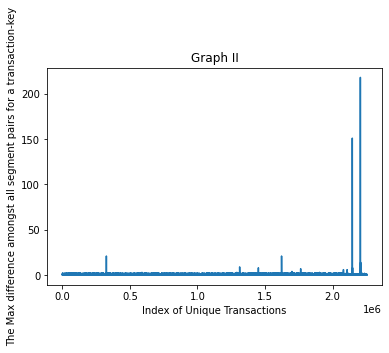

In [163]:
plt.plot(range(0,len(numberofSegmentEachFrame)),maxPairDifferenceEachFrame)
plt.xlabel('Index of Unique Transactions')
plt.ylabel('The Max difference amongst all segment pairs for a transaction-key')
plt.title('Graph II')
plt.show()

We notice that though their are outliers, but their probability of occurence is less.

In [165]:
sumCounter = 0
n = 0

for s in maxPairDifferenceEachFrame:
    if s != 0:
        sumCounter+=s
        n+=1
        
mean = sumCounter/n

standardDeviation = 0

for s in maxPairDifferenceEachFrame:
    if s!=0:
        standardDeviation += (s-mean)**2

standardDeviation = (standardDeviation**0.5)/n

print(standardDeviation)
print(mean)

0.004879442244473878
1.029218062074737


Thus, for multiple segments we can estimate a difference of '1' day between the departure dates of Origin and destination

#### Analysing if in a one-way trip a node or airport is visited twice

In [19]:
oneway_df = df[df["TRIP_TYPE"]=="'OW'"]

In [22]:
df[df["TRANSACTION_KEY"]=="'T-1800737947700003829'"]

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
1338069,'T-1800737947700003829','Air China LTD ','999','','2018-01-05','CN','R','OW',1,'Air China LTD ','CA',1393,'Econ','PEK','HAK','2018-01-01',CN,CN
1338070,'T-1800737947700003829','Air China LTD ','999','','2018-01-05','CN','R','OW',2,'Air China LTD ','CA',1393,'Econ','PEK','HAK','2018-01-01',CN,CN


In [ ]:
inValidTransactionKeys = []

for transactionKey, frame in oneway_df.groupby(by=["TRANSACTION_KEY"]):
    visitedNodes = set([])
    sortedDF = frame.sort_values(by="SEG_NUMBER") # In descending order
    firstRow = True
    inValid = False
    for index, row in sortedDF.iterrows():
        if firstRow is False:
            
            if row["DESTINATION_AIRPORT"] not in visitedNodes:
                visitedNodes.add(row["DESTINATION_AIRPORT"])
            else:
                inValid = True

        else:
            firstRow = False

            if row["ORIGIN_AIRPORT"] not in visitedNodes:
                visitedNodes.add(row["ORIGIN_AIRPORT"])
            else:
                inValid = True

            if row["DESTINATION_AIRPORT"] not in visitedNodes:
                visitedNodes.add(row["DESTINATION_AIRPORT"])
            else:
                inValid = True

        if inValid:
            inValidTransactionKeys.append(transactionKey)
            break

In [32]:
temp_df = df[df["TRANSACTION_KEY"].isin(inValidTransactionKeys)]
temp_df

,TRANSACTION_KEY,TICKETING_AIRLINE,TICKETING_AIRLINE_CD,AGENCY,ISSUE_DATE,COUNTRY,TRANSACTION_TYPE,TRIP_TYPE,SEG_NUMBER,MARKETING_AIRLINE,MARKETING_AIRLINE_CD,FLIGHT_NUMBER,CABIN,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DATE,ORIGIN_COUNTRY,DESTINATION_COUNTRY
124559,'T-1829743105700007211','Hainan Airlines Holding Company ','880','','2018-10-24','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7113,'Econ','CAN','NKG','2018-10-18',CN,CN
124560,'T-1829743105700007211','Hainan Airlines Holding Company ','880','','2018-10-24','CN','R','OW',2,'Hainan Airlines Holding Company ','HU',7113,'Econ','CAN','NKG','2018-10-18',CN,CN
124570,'T-1829743105700008882','Hainan Airlines Holding Company ','880','','2018-10-24','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7475,'Econ','PVG','CKG','2018-10-26',CN,CN
124571,'T-1829743105700008882','Hainan Airlines Holding Company ','880','','2018-10-24','CN','R','OW',2,'Hainan Airlines Holding Company ','HU',7475,'Econ','PVG','CKG','2018-10-26',CN,CN
182499,'T-1834543980900001799','Hainan Airlines Holding Company ','880','','2018-12-12','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7634,'Econ','KWE','SYX','2018-12-02',CN,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6857567,'T-1829643083400025659','Hainan Airlines Holding Company ','880','','2018-10-23','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7451,'Econ','HGH','CSX','2018-10-24',CN,CN
6857568,'T-1829643083400025659','Hainan Airlines Holding Company ','880','','2018-10-23','CN','R','OW',2,'Hainan Airlines Holding Company ','HU',7451,'Econ','HGH','CSX','2018-10-24',CN,CN
6959014,'T-1825642419600000897','Hainan Airlines Holding Company ','880','','2018-09-13','CN','R','OW',1,'Hainan Airlines Holding Company ','HU',7342,'Econ','KWE','SZX','2018-09-11',CN,CN
6959015,'T-1825642419600000897','Hainan Airlines Holding Company ','880','','2018-09-13','CN','R','OW',2,'Hainan Airlines Holding Company ','HU',7342,'Econ','KWE','SZX','2018-09-11',CN,CN


In [36]:
temp_df["TRANSACTION_TYPE"].unique()

array(["'R'"], dtype=object)

In [42]:
len(df["TRANSACTION_KEY"][df["TRANSACTION_TYPE"]=="'R'"].unique())

178590

In [41]:
len(temp_df["TRANSACTION_KEY"].unique())

161

Since, only 0.09% of the dataset has errorneous duplicate varlues for a Return Transaction, we can either remove such transaction keys from the dataset, or handle them while implementing algorithm.

Also, this may be due to the fact that bus trips are not refunded. Since, the airports are in same country, its probable all these lost interconnectivities are covered by bus